In [39]:
#CUSTOMER CHURN ANALYSIS ON BANK DATASET

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [41]:
# Data Loading and Exploration
import pandas as pd
import numpy as np

# Load the dataset from a CSV file
file_path = "C:/UCD MSBA Coursework/Spring Quarter/Application Domains/Churn_Modelling.csv"  
data = pd.read_csv(file_path)

# Quick overview of the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


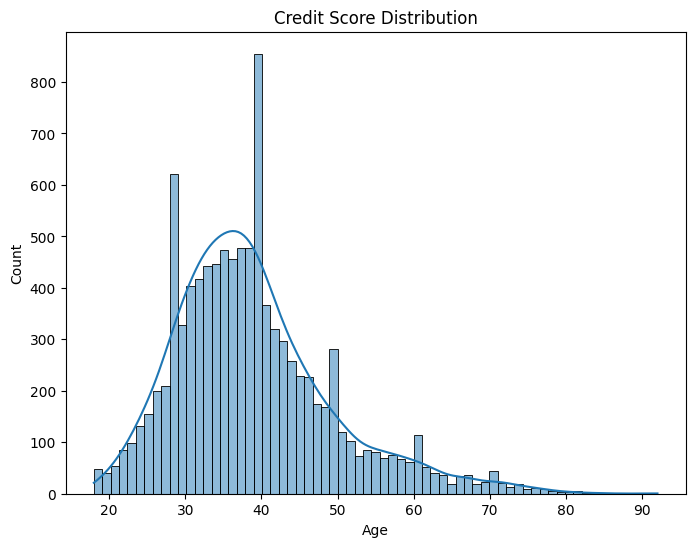

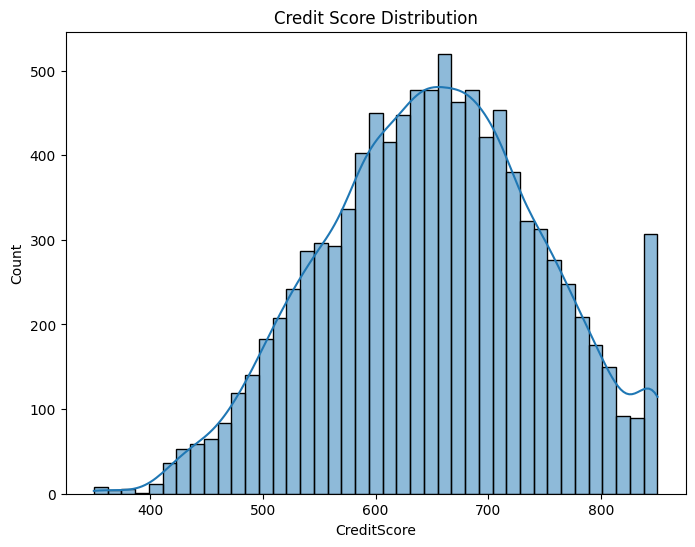

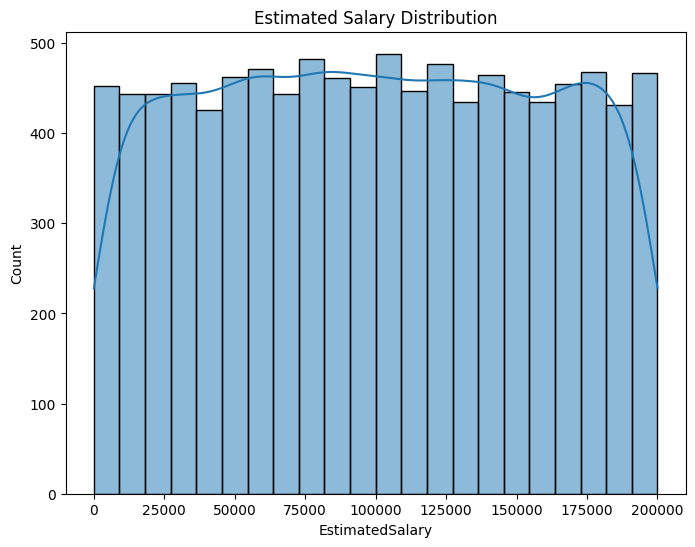


Count of customers by geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Count of customers by gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


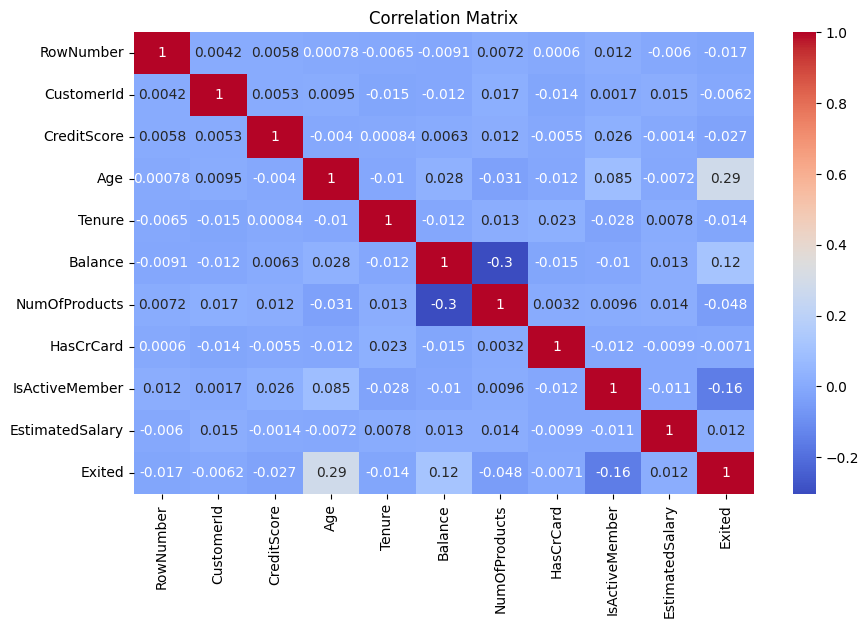

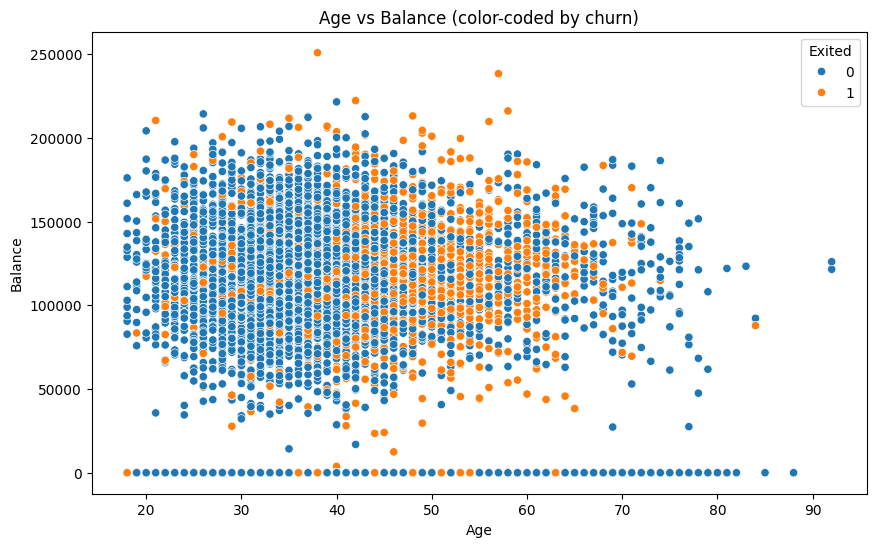

In [42]:
#Applying the Data Science Process Model

# Visualize the distribution of a few key features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Credit Score Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['CreditScore'], kde=True)
plt.title('Credit Score Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['EstimatedSalary'], kde=True)
plt.title('Estimated Salary Distribution')
plt.show()

# Analyzing categorical data

# Count of customers in each geography
print("\nCount of customers by geography:")
print(data['Geography'].value_counts())  

# Count of customers by gender
print("\nCount of customers by gender:")
print(data['Gender'].value_counts())  

# List of numeric columns (excluding known non-numeric - 'Surname')
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Create a new DataFrame with only numeric columns
data_numeric = data[numeric_cols]

# Calculate correlation matrix
correlation_matrix = data_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


# Scatterplot of age vs balance to check relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=data)
plt.title('Age vs Balance (color-coded by churn)')
plt.show()

from the visuals, key insights could be observed
1. The age distribution appears to be roughly normal or bell-shaped, with the majority of customers concentrated around the ages of 30 to 50. The peak of the distribution is around the age group of 40-45 years

2. The distribution for credit score appears to be right-skewed. The peak of the distribution is around the credit score range of 600-700, indicating that a significant portion of customers have credit scores in this range

3. There are relatively fewer customers with very low credit scores below 400 or very high credit scores above 800. This skewed distribution is typical for credit score data, as most customers tend to have average or good credit scores, while relatively fewer customers have poor or excellent credit scores

4. The salary distribution appears to be relatively uniform. There are customers present across the entire salary spectrum, from lower salary ranges (around $25,000 - $50,000) to higher salary ranges (up to $200,000)

The distribution does not follow a typical bell-shaped or skewed pattern often observed in many real-world distributions

It's worth noting that the absence of sharp peaks or heavy concentrations in specific salary ranges might make it more challenging to identify distinct customer segments or patterns based solely on the estimated salary feature

The "Exited" variable (target variable) has the highest positive correlation with "Age" (0.29) and "Tenure" (0.12), indicating that older customers and those with longer tenures are more likely to churn

"Exited" variable has a negative correlation with "CreditScore" (-0.027), suggesting that customers with lower credit scores are more prone to churn

Some variables like "RowNumber" and "CustomerId" have very low or near-zero correlations with other variables, which is expected as these are likely unique identifiers and not related to customer behavior or attributes

plot visualizing the relationship between a customer's age and their account balance appears to be a positive correlation between age and account balance, where older customers tend to have higher account balances on average

The majority of customers who have not churned (blue dots) are concentrated in the age range of around 20-45 years old. 
a higher concentration of churned customers among the older age groups 45 years and above

In [43]:

# Drop unnecessary columns if they exist
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, errors='ignore')

# Display the columns to understand what's in the DataFrame
print("Columns in DataFrame:", data.columns)

# If Geography and Gender are not already one-hot encoded, encode them
expected_columns = ['Geography_Germany', 'Geography_Spain', 'Gender_Male']
if not all(col in data.columns for col in expected_columns):
    # One-hot encode 'Geography' and 'Gender'
    data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into training and testing sets
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Columns in DataFrame: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [44]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print("\nROC AUC Score:", roc_auc)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


Logistic Regression Model:
Confusion Matrix:
[[1543   64]
 [ 314   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


ROC AUC Score: 0.7788998829864888


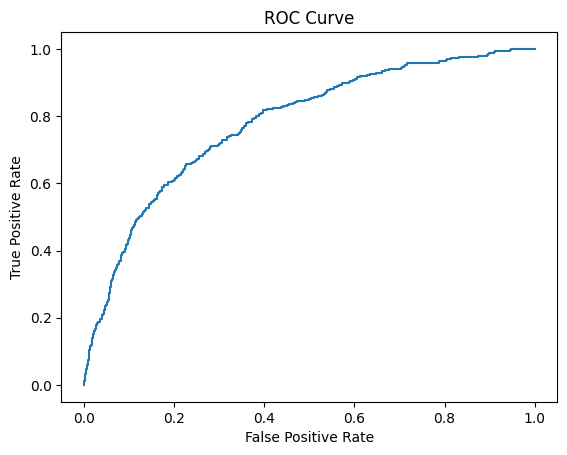

In [45]:
# Build Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Logistic Regression Model:")
evaluate_model(log_reg, X_test, y_test)


The overall accuracy of 81% indicates a moderate level of correct predictions. However, the recall for class 1 (churned customers) is low, suggesting the model struggles to identify customers who have churned. This could lead to business losses due to undetected churn

The logistic regression model, while having high accuracy, shows a concerningly low recall for churners, indicating a potential gap in the model's ability to predict churn. This could lead to undetected churn and business losses.

SVM Model:
Confusion Matrix:
[[1607    0]
 [ 393    0]]

Classification Report:


c:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nithy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


ROC AUC Score: 0.6777900755441761


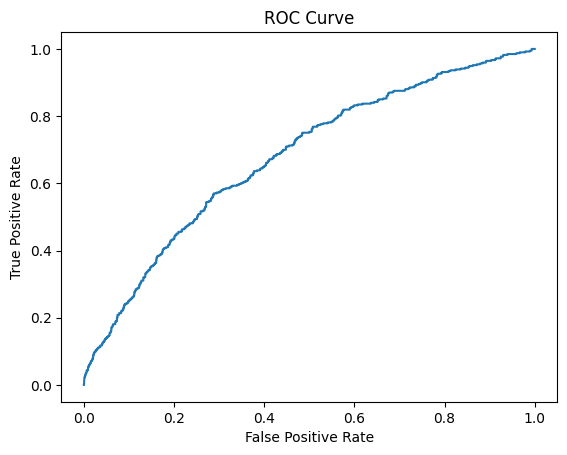

In [46]:
# Build SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
print("SVM Model:")
evaluate_model(svm_model, X_test, y_test)


The accuracy is high at 80%, but the confusion matrix and classification report show that the model predicts only class 0 (non-churners), leading to zero recall for churned customers. This behavior is unacceptable in churn analysis, as it results in all churned customers being misclassified.

The SVM model, predicting only non-churners, is inadequate for churn analysis and should be re-evaluated or discarded

Random Forest Model:
Confusion Matrix:
[[1550   57]
 [ 210  183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


ROC AUC Score: 0.8653307492189862


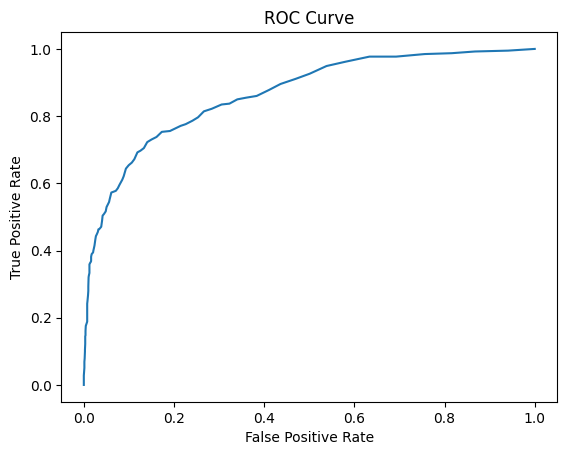

In [47]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model:")
evaluate_model(rf_model, X_test, y_test)


With an accuracy of 87% and relatively balanced recall for both classes, this model outperforms the others in detecting churners. The ROC AUC score of 0.87 indicates a good discriminatory power, suggesting that Random Forest may be the best choice among the three models.

The Random Forest model offers a good balance between precision and recall. The higher recall for class 1 (churned customers) suggests that this model is better suited for churn analysis, as it is critical to identify and retain customers at risk of churning.

Business Impact of False Positives and False Negatives:

False Positives (FP): A false positive occurs when a non-churner is predicted to be a churner. This may result in unnecessary customer retention efforts, which could be costly.

False Negatives (FN): A false negative occurs when a churner is predicted to be a non-churner. This poses a significant business risk, as these customers might not receive the attention needed to prevent churn.

In this context, the higher rate of FNs in the Logistic Regression and SVM models suggests they may not be suitable for churn prediction. The lower FN rate in the Random Forest model indicates that it could be more effective in minimizing business risks.

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 200}
Random Forest Model after GridSearchCV:
Confusion Matrix:
[[1552   55]
 [ 213  180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


ROC AUC Score: 0.8718424956971011


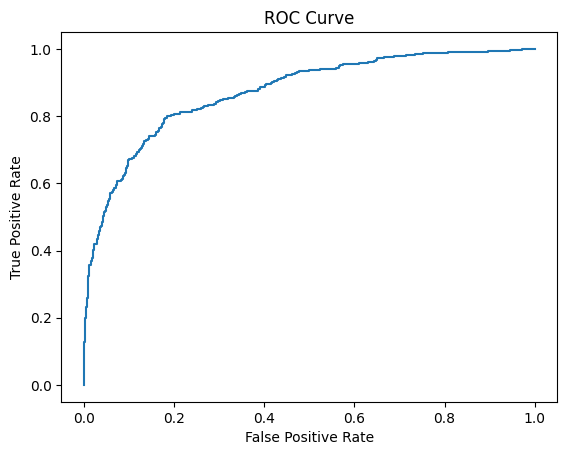

In [48]:
# Optional: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
print("Random Forest Model after GridSearchCV:")
evaluate_model(best_rf_model, X_test, y_test)


The confusion matrix shows a relatively low number of false positives (55) and a moderate number of false negatives (213). This balance is crucial in churn prediction because false negatives can be more detrimental to business outcomes.

The recall for class 1 (churned customers) has improved to 46%, which is a considerable increase from previous models. This suggests that the model is better at identifying customers who have exited, reducing business risk.

The improvement in the Random Forest model after applying GridSearchCV shows the importance of hyperparameter tuning in improving model performance. The selected hyperparameters (e.g., 'max_depth', 'min_samples_split', 'n_estimators') should be highlighted to demonstrate the efforts taken to optimize the model. This shows that even well-performing models can be optimized with the right hyperparameters